# IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#  IMPORTING DATA

In [2]:
data=pd.read_csv('Fraud_check.csv')

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# DATA UNDERSTANDING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.shape

(600, 6)

In [7]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [10]:
data['Undergrad'] = label.fit_transform(data['Undergrad'])
data['Marital.Status'] = label.fit_transform(data['Marital.Status'])
data['Urban'] = label.fit_transform(data['Urban'])

In [11]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [12]:
data.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

In [13]:
data.insert(6,'tax_category','')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,
596,1,0,69967,55369,2,1,
597,0,0,47334,154058,0,1,
598,1,1,98592,180083,17,0,


In [14]:
for i in range(0,len(data['Taxable.Income'])):
    if data['Taxable.Income'][i]<=30000:
        data['tax_category'][i] = 'Risky'
    else:
        data['tax_category'][i] = 'Good'

In [15]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


#  MODEL BUILDING

In [16]:
x = data.drop(labels=['Taxable.Income','tax_category'],axis=1)
y = data[['tax_category']]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

# MODEL TRAINING

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred =model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score is',accuracy_score(y_test,y_pred))
print('confusion matrix is \n',confusion_matrix(y_test,y_pred))
print('classification report is \n',classification_report(y_test,y_pred))

Accuracy score is 0.6416666666666667
confusion matrix is 
 [[71 24]
 [19  6]]
classification report is 
               precision    recall  f1-score   support

        Good       0.79      0.75      0.77        95
       Risky       0.20      0.24      0.22        25

    accuracy                           0.64       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.67      0.64      0.65       120



In [21]:
import matplotlib.pyplot as plt

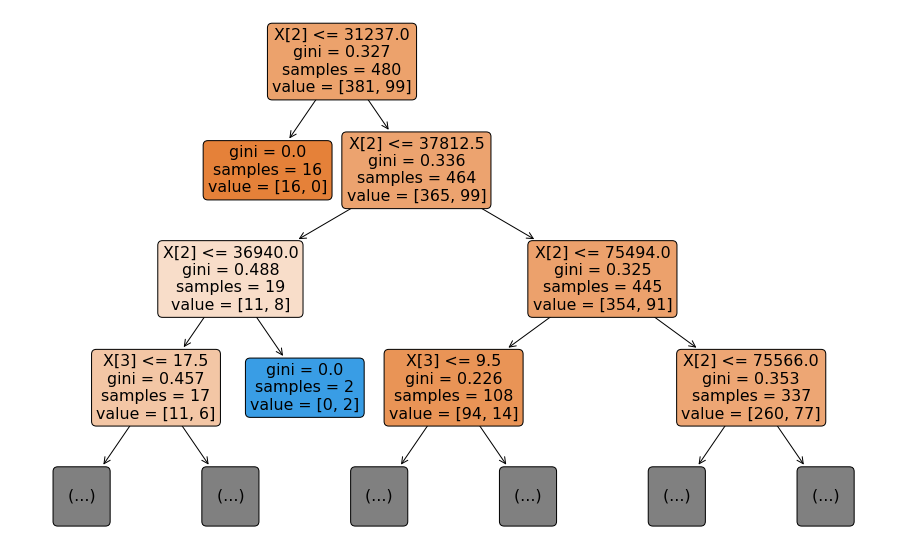

In [22]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(model,filled=True,rounded=True,max_depth=3)
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7895833333333333


In [24]:
data['tax_category'].value_counts()

Good     476
Risky    124
Name: tax_category, dtype: int64

In [25]:
pip install imblearn

In [26]:
from imblearn import over_sampling

In [27]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_smt,y_smt = smt.fit_resample(x,y)

In [28]:
x_smt.shape,y_smt.shape

((952, 5), (952, 1))

In [29]:
x_train_smt,x_test_smt,y_train_smt,y_test_smt = train_test_split(x_smt,y_smt,test_size=0.20,random_state=12)

In [30]:
model_smt = DecisionTreeClassifier()
model_smt.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred_smt =model_smt.predict(x_test_smt)

In [32]:
print('Accuracy score is',accuracy_score(y_test_smt,y_pred_smt))

Accuracy score is 0.7539267015706806


In [33]:
print('confusion matrix is \n',confusion_matrix(y_test_smt,y_pred_smt))

confusion matrix is 
 [[89  3]
 [44 55]]


In [34]:
print('classification report is \n',classification_report(y_test_smt,y_pred_smt))

classification report is 
               precision    recall  f1-score   support

        Good       0.67      0.97      0.79        92
       Risky       0.95      0.56      0.70        99

    accuracy                           0.75       191
   macro avg       0.81      0.76      0.75       191
weighted avg       0.81      0.75      0.74       191



Text(0.5, 1.0, 'Accuracy Score: 0.6416666666666667')

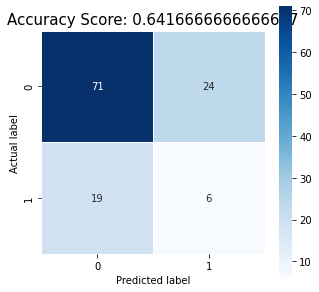

In [35]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [37]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [38]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.793750,0.791667
1,2,0.793750,0.791667
2,3,0.797917,0.791667
3,4,0.797917,0.791667
4,5,0.808333,0.775000
5,6,0.810417,0.775000
6,7,0.818750,0.766667
7,8,0.822917,0.758333
8,9,0.833333,0.750000
9,10,0.843750,0.733333


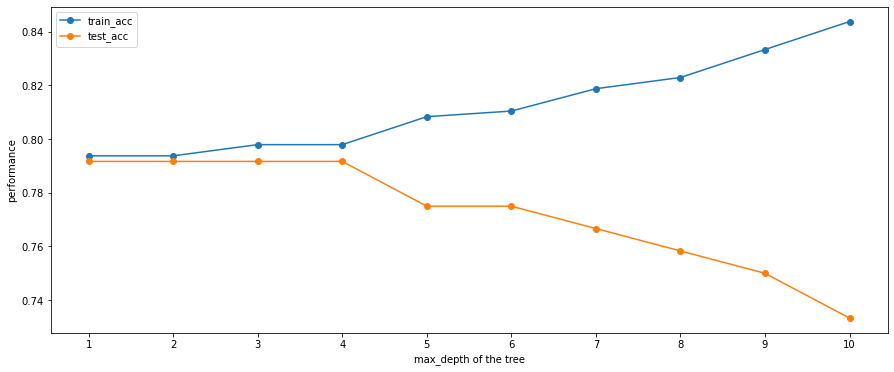

In [39]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'], marker = 'o')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

In [48]:
y_pred_smt =model_smt.predict(x_test_smt)

In [49]:
print('Accuracy score is',accuracy_score(y_test_smt,y_pred_smt))

Accuracy score is 0.7539267015706806


# <u>==========================================================================